
=== Model Evaluation ===
Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

     drizzle       0.20      0.11      0.14         9
         fog       0.40      0.08      0.13        25
        rain       0.92      0.92      0.92       120
        snow       0.40      0.25      0.31         8
         sun       0.78      0.95      0.86       131

    accuracy                           0.82       293
   macro avg       0.54      0.46      0.47       293
weighted avg       0.78      0.82      0.78       293



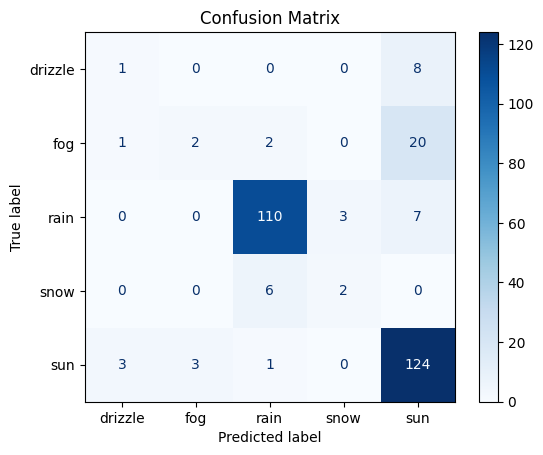


Feature Importances:
precipitation: 0.52
temp_max: 0.19
temp_min: 0.15
wind: 0.14

=== Weather Prediction ===
Precipitation (mm): 1
Max Temperature (°C): 45
Min Temperature (°C): 35
Wind Speed (km/h): 25

Predicted Weather: rain (Confidence: 96.0%)

Predict again? (y/n): 


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                           classification_report,
                           confusion_matrix,
                           ConfusionMatrixDisplay)
import matplotlib.pyplot as plt

# 1. Load and Prepare Data
data = pd.read_csv('/content/seattle-weather.csv')
X = data[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = data['weather']

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train Random Forest Model
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    oob_score=True  # Enable Out-of-Bag evaluation
)
model.fit(X_train, y_train)

# 4. Model Evaluation
print("\n=== Model Evaluation ===")
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
print("\nFeature Importances:")
for name, importance in zip(X.columns, model.feature_importances_):
    print(f"{name}: {importance:.2f}")

# 5. User Input Prediction
def predict_weather():
    print("\n=== Weather Prediction ===")
    try:
        precipitation = float(input("Precipitation (mm): "))
        temp_max = float(input("Max Temperature (°C): "))
        temp_min = float(input("Min Temperature (°C): "))
        wind = float(input("Wind Speed (km/h): "))

        user_data = pd.DataFrame({
            'precipitation': [precipitation],
            'temp_max': [temp_max],
            'temp_min': [temp_min],
            'wind': [wind]
        })

        prediction = model.predict(user_data)[0]
        probability = model.predict_proba(user_data).max()

        print(f"\nPredicted Weather: {prediction} (Confidence: {probability:.1%})")

    except ValueError:
        print("Invalid input! Please enter numbers.")

# Run prediction in loop
while True:
    predict_weather()
    if input("\nPredict again? (y/n): ").lower() != 'y':
        break